# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import itertools
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
x_train.shape

(50000, 3072)

In [7]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)

    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
            
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    
    return model

In [10]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4]
optimizers = ["adam", "SGD", "RMSprop", "Adadelta"]
# LEARNING_RATE = [1e-1]
# optimizers = ["adam", "SGD"]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.5

In [11]:
results = {}

for lr, optimizer in itertools.product(LEARNING_RATE, optimizers):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f, Optimizer = %s" % (lr, optimizer))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
#     optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=momentum)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s-optimizer-%s" % (str(lr), str(optimizer))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.100000, Optimizer = adam
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/

50000/50000 [==============================] - 9s 170us/step - loss: 0.6604 - accuracy: 0.7638 - val_loss: 1.7330 - val_accuracy: 0.5160
Epoch 49/50
50000/50000 [==============================] - 8s 169us/step - loss: 0.6645 - accuracy: 0.7641 - val_loss: 1.7503 - val_accuracy: 0.5124
Epoch 50/50
50000/50000 [==============================] - 8s 170us/step - loss: 0.6387 - accuracy: 0.7724 - val_loss: 1.8192 - val_accuracy: 0.5114
Experiment with LR = 0.100000, Optimizer = SGD
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_______________________________________

50000/50000 [==============================] - 6s 129us/step - loss: 1.2591 - accuracy: 0.5580 - val_loss: 1.4382 - val_accuracy: 0.4883
Epoch 46/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.2484 - accuracy: 0.5623 - val_loss: 1.5127 - val_accuracy: 0.4626
Epoch 47/50
50000/50000 [==============================] - 6s 128us/step - loss: 1.2409 - accuracy: 0.5642 - val_loss: 1.4438 - val_accuracy: 0.4914
Epoch 48/50
50000/50000 [==============================] - 7s 130us/step - loss: 1.2454 - accuracy: 0.5629 - val_loss: 1.3712 - val_accuracy: 0.5126
Epoch 49/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.2284 - accuracy: 0.5693 - val_loss: 1.4631 - val_accuracy: 0.4939
Epoch 50/50
50000/50000 [==============================] - 7s 135us/step - loss: 1.2285 - accuracy: 0.5686 - val_loss: 1.6025 - val_accuracy: 0.4497
Experiment with LR = 0.100000, Optimizer = RMSprop
Model: "model_1"
__________________________________________________

50000/50000 [==============================] - 8s 150us/step - loss: 0.8710 - accuracy: 0.6850 - val_loss: 1.6615 - val_accuracy: 0.5036
Epoch 43/50
50000/50000 [==============================] - 7s 150us/step - loss: 0.8544 - accuracy: 0.6915 - val_loss: 2.0057 - val_accuracy: 0.4621
Epoch 44/50
50000/50000 [==============================] - 7s 149us/step - loss: 0.8463 - accuracy: 0.6979 - val_loss: 1.7629 - val_accuracy: 0.4946
Epoch 45/50
50000/50000 [==============================] - 7s 148us/step - loss: 0.8272 - accuracy: 0.7016 - val_loss: 1.9698 - val_accuracy: 0.4608
Epoch 46/50
50000/50000 [==============================] - 7s 148us/step - loss: 0.8216 - accuracy: 0.7042 - val_loss: 1.7702 - val_accuracy: 0.4800
Epoch 47/50
50000/50000 [==============================] - 7s 148us/step - loss: 0.8062 - accuracy: 0.7112 - val_loss: 1.9401 - val_accuracy: 0.4747
Epoch 48/50
50000/50000 [==============================] - 7s 148us/step - loss: 0.7988 - accuracy: 0.7116 - val_loss:

50000/50000 [==============================] - 9s 183us/step - loss: 0.8377 - accuracy: 0.7004 - val_loss: 1.8183 - val_accuracy: 0.4715
Epoch 40/50
50000/50000 [==============================] - 9s 184us/step - loss: 0.8211 - accuracy: 0.7067 - val_loss: 1.8110 - val_accuracy: 0.4758
Epoch 41/50
50000/50000 [==============================] - 9s 184us/step - loss: 0.7961 - accuracy: 0.7157 - val_loss: 1.7910 - val_accuracy: 0.4766
Epoch 42/50
50000/50000 [==============================] - 9s 184us/step - loss: 0.7745 - accuracy: 0.7235 - val_loss: 2.2955 - val_accuracy: 0.4168
Epoch 43/50
50000/50000 [==============================] - 9s 184us/step - loss: 0.7605 - accuracy: 0.7268 - val_loss: 1.9374 - val_accuracy: 0.4778
Epoch 44/50
50000/50000 [==============================] - 9s 184us/step - loss: 0.7459 - accuracy: 0.7349 - val_loss: 1.8250 - val_accuracy: 0.4980
Epoch 45/50
50000/50000 [==============================] - 9s 184us/step - loss: 0.7318 - accuracy: 0.7394 - val_loss:

50000/50000 [==============================] - 8s 154us/step - loss: 0.8610 - accuracy: 0.6928 - val_loss: 1.4875 - val_accuracy: 0.5228
Epoch 37/50
50000/50000 [==============================] - 8s 153us/step - loss: 0.8328 - accuracy: 0.7043 - val_loss: 1.5495 - val_accuracy: 0.5110
Epoch 38/50
50000/50000 [==============================] - 8s 154us/step - loss: 0.8194 - accuracy: 0.7081 - val_loss: 1.5212 - val_accuracy: 0.5198
Epoch 39/50
50000/50000 [==============================] - 8s 153us/step - loss: 0.8105 - accuracy: 0.7108 - val_loss: 1.5604 - val_accuracy: 0.5155
Epoch 40/50
50000/50000 [==============================] - 8s 154us/step - loss: 0.7902 - accuracy: 0.7184 - val_loss: 1.5356 - val_accuracy: 0.5280
Epoch 41/50
50000/50000 [==============================] - 8s 156us/step - loss: 0.7630 - accuracy: 0.7287 - val_loss: 1.5611 - val_accuracy: 0.5283
Epoch 42/50
50000/50000 [==============================] - 8s 154us/step - loss: 0.7675 - accuracy: 0.7240 - val_loss:

50000/50000 [==============================] - 7s 130us/step - loss: 1.3454 - accuracy: 0.5275 - val_loss: 1.4288 - val_accuracy: 0.4915
Epoch 34/50
50000/50000 [==============================] - 6s 129us/step - loss: 1.3426 - accuracy: 0.5280 - val_loss: 1.4734 - val_accuracy: 0.4672
Epoch 35/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.3308 - accuracy: 0.5329 - val_loss: 1.4854 - val_accuracy: 0.4732
Epoch 36/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.3295 - accuracy: 0.5326 - val_loss: 1.4938 - val_accuracy: 0.4750
Epoch 37/50
50000/50000 [==============================] - 6s 115us/step - loss: 1.3193 - accuracy: 0.5383 - val_loss: 1.4356 - val_accuracy: 0.4967
Epoch 38/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.3092 - accuracy: 0.5399 - val_loss: 1.4254 - val_accuracy: 0.4868
Epoch 39/50
50000/50000 [==============================] - 6s 115us/step - loss: 1.3041 - accuracy: 0.5416 - val_loss:

50000/50000 [==============================] - 7s 143us/step - loss: 1.0576 - accuracy: 0.6207 - val_loss: 1.6262 - val_accuracy: 0.4663
Epoch 31/50
50000/50000 [==============================] - 7s 142us/step - loss: 1.0385 - accuracy: 0.6289 - val_loss: 1.6280 - val_accuracy: 0.4963
Epoch 32/50
50000/50000 [==============================] - 7s 139us/step - loss: 1.0238 - accuracy: 0.6342 - val_loss: 1.6418 - val_accuracy: 0.4834
Epoch 33/50
50000/50000 [==============================] - 7s 139us/step - loss: 1.0059 - accuracy: 0.6412 - val_loss: 1.6383 - val_accuracy: 0.4786
Epoch 34/50
50000/50000 [==============================] - 7s 139us/step - loss: 0.9835 - accuracy: 0.6472 - val_loss: 1.7134 - val_accuracy: 0.4762
Epoch 35/50
50000/50000 [==============================] - 7s 139us/step - loss: 0.9772 - accuracy: 0.6509 - val_loss: 1.7358 - val_accuracy: 0.4640
Epoch 36/50
50000/50000 [==============================] - 7s 138us/step - loss: 0.9581 - accuracy: 0.6580 - val_loss:

50000/50000 [==============================] - 8s 166us/step - loss: 1.0859 - accuracy: 0.6130 - val_loss: 1.5595 - val_accuracy: 0.4717
Epoch 28/50
50000/50000 [==============================] - 8s 167us/step - loss: 1.0552 - accuracy: 0.6229 - val_loss: 1.5873 - val_accuracy: 0.4851
Epoch 29/50
50000/50000 [==============================] - 8s 166us/step - loss: 1.0425 - accuracy: 0.6298 - val_loss: 1.6246 - val_accuracy: 0.4717
Epoch 30/50
50000/50000 [==============================] - 8s 167us/step - loss: 1.0209 - accuracy: 0.6337 - val_loss: 1.5746 - val_accuracy: 0.4907
Epoch 31/50
50000/50000 [==============================] - 8s 166us/step - loss: 0.9965 - accuracy: 0.6460 - val_loss: 1.5227 - val_accuracy: 0.5001
Epoch 32/50
50000/50000 [==============================] - 8s 167us/step - loss: 0.9787 - accuracy: 0.6496 - val_loss: 1.5658 - val_accuracy: 0.4959
Epoch 33/50
50000/50000 [==============================] - 8s 167us/step - loss: 0.9634 - accuracy: 0.6550 - val_loss:

50000/50000 [==============================] - 8s 157us/step - loss: 1.0460 - accuracy: 0.6301 - val_loss: 1.3928 - val_accuracy: 0.5257
Epoch 25/50
50000/50000 [==============================] - 9s 176us/step - loss: 1.0285 - accuracy: 0.6342 - val_loss: 1.4042 - val_accuracy: 0.5292
Epoch 26/50
50000/50000 [==============================] - 8s 165us/step - loss: 1.0167 - accuracy: 0.6376 - val_loss: 1.4364 - val_accuracy: 0.5208
Epoch 27/50
50000/50000 [==============================] - 8s 155us/step - loss: 0.9921 - accuracy: 0.6461 - val_loss: 1.4173 - val_accuracy: 0.5182
Epoch 28/50
50000/50000 [==============================] - 8s 157us/step - loss: 0.9677 - accuracy: 0.6534 - val_loss: 1.4165 - val_accuracy: 0.5210
Epoch 29/50
50000/50000 [==============================] - 9s 176us/step - loss: 0.9485 - accuracy: 0.6634 - val_loss: 1.4428 - val_accuracy: 0.5260
Epoch 30/50
50000/50000 [==============================] - 9s 176us/step - loss: 0.9286 - accuracy: 0.6676 - val_loss:

50000/50000 [==============================] - 6s 116us/step - loss: 1.4640 - accuracy: 0.4867 - val_loss: 1.5905 - val_accuracy: 0.4295
Epoch 22/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.4484 - accuracy: 0.4915 - val_loss: 1.4889 - val_accuracy: 0.4720
Epoch 23/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.4400 - accuracy: 0.4947 - val_loss: 1.5085 - val_accuracy: 0.4583
Epoch 24/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.4327 - accuracy: 0.4964 - val_loss: 1.4758 - val_accuracy: 0.4743
Epoch 25/50
50000/50000 [==============================] - 6s 115us/step - loss: 1.4196 - accuracy: 0.5042 - val_loss: 1.5375 - val_accuracy: 0.4527
Epoch 26/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.4123 - accuracy: 0.5045 - val_loss: 1.5196 - val_accuracy: 0.4561
Epoch 27/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.4030 - accuracy: 0.5085 - val_loss:

50000/50000 [==============================] - 7s 137us/step - loss: 1.2856 - accuracy: 0.5443 - val_loss: 1.7633 - val_accuracy: 0.4175
Epoch 19/50
50000/50000 [==============================] - 7s 138us/step - loss: 1.2608 - accuracy: 0.5479 - val_loss: 1.5068 - val_accuracy: 0.4784
Epoch 20/50
50000/50000 [==============================] - 7s 142us/step - loss: 1.2360 - accuracy: 0.5598 - val_loss: 1.6445 - val_accuracy: 0.4435
Epoch 21/50
50000/50000 [==============================] - 7s 138us/step - loss: 1.2180 - accuracy: 0.5645 - val_loss: 1.6251 - val_accuracy: 0.4451
Epoch 22/50
50000/50000 [==============================] - 7s 137us/step - loss: 1.1995 - accuracy: 0.5710 - val_loss: 1.6060 - val_accuracy: 0.4568
Epoch 23/50
50000/50000 [==============================] - 7s 137us/step - loss: 1.1729 - accuracy: 0.5814 - val_loss: 1.5948 - val_accuracy: 0.4646
Epoch 24/50
50000/50000 [==============================] - 7s 138us/step - loss: 1.1575 - accuracy: 0.5870 - val_loss:

50000/50000 [==============================] - 8s 167us/step - loss: 1.3404 - accuracy: 0.5211 - val_loss: 1.5873 - val_accuracy: 0.4297
Epoch 16/50
50000/50000 [==============================] - 8s 167us/step - loss: 1.3240 - accuracy: 0.5281 - val_loss: 1.6105 - val_accuracy: 0.4412
Epoch 17/50
50000/50000 [==============================] - 8s 168us/step - loss: 1.3019 - accuracy: 0.5379 - val_loss: 1.5727 - val_accuracy: 0.4549
Epoch 18/50
50000/50000 [==============================] - 8s 167us/step - loss: 1.2754 - accuracy: 0.5458 - val_loss: 1.5581 - val_accuracy: 0.4607
Epoch 19/50
50000/50000 [==============================] - 8s 167us/step - loss: 1.2495 - accuracy: 0.5534 - val_loss: 1.5350 - val_accuracy: 0.4619
Epoch 20/50
50000/50000 [==============================] - 8s 170us/step - loss: 1.2307 - accuracy: 0.5615 - val_loss: 1.4353 - val_accuracy: 0.4956
Epoch 21/50
50000/50000 [==============================] - 8s 167us/step - loss: 1.2079 - accuracy: 0.5672 - val_loss:

50000/50000 [==============================] - 8s 163us/step - loss: 1.3013 - accuracy: 0.5368 - val_loss: 1.3955 - val_accuracy: 0.5029
Epoch 13/50
50000/50000 [==============================] - 8s 160us/step - loss: 1.2797 - accuracy: 0.5432 - val_loss: 1.4139 - val_accuracy: 0.5023
Epoch 14/50
50000/50000 [==============================] - 8s 151us/step - loss: 1.2528 - accuracy: 0.5522 - val_loss: 1.4183 - val_accuracy: 0.5003
Epoch 15/50
50000/50000 [==============================] - 8s 151us/step - loss: 1.2335 - accuracy: 0.5615 - val_loss: 1.4507 - val_accuracy: 0.4886
Epoch 16/50
50000/50000 [==============================] - 8s 150us/step - loss: 1.2185 - accuracy: 0.5636 - val_loss: 1.3816 - val_accuracy: 0.5166
Epoch 17/50
50000/50000 [==============================] - 8s 160us/step - loss: 1.1984 - accuracy: 0.5726 - val_loss: 1.3377 - val_accuracy: 0.5331
Epoch 18/50
50000/50000 [==============================] - 8s 169us/step - loss: 1.1751 - accuracy: 0.5806 - val_loss:

50000/50000 [==============================] - 6s 115us/step - loss: 1.6304 - accuracy: 0.4268 - val_loss: 1.6387 - val_accuracy: 0.4201
Epoch 10/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.6134 - accuracy: 0.4332 - val_loss: 1.6918 - val_accuracy: 0.4001
Epoch 11/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.5911 - accuracy: 0.4431 - val_loss: 1.5840 - val_accuracy: 0.4475
Epoch 12/50
50000/50000 [==============================] - 6s 124us/step - loss: 1.5824 - accuracy: 0.4445 - val_loss: 1.6556 - val_accuracy: 0.4209
Epoch 13/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.5614 - accuracy: 0.4507 - val_loss: 1.6546 - val_accuracy: 0.4052
Epoch 14/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.5490 - accuracy: 0.4548 - val_loss: 1.5540 - val_accuracy: 0.4555
Epoch 15/50
50000/50000 [==============================] - 7s 130us/step - loss: 1.5408 - accuracy: 0.4588 - val_loss:

50000/50000 [==============================] - 7s 137us/step - loss: 1.6148 - accuracy: 0.4229 - val_loss: 1.6169 - val_accuracy: 0.4154
Epoch 7/50
50000/50000 [==============================] - 7s 137us/step - loss: 1.5783 - accuracy: 0.4381 - val_loss: 1.7338 - val_accuracy: 0.3805
Epoch 8/50
50000/50000 [==============================] - 7s 137us/step - loss: 1.5434 - accuracy: 0.4485 - val_loss: 1.6973 - val_accuracy: 0.3973
Epoch 9/50
50000/50000 [==============================] - 7s 138us/step - loss: 1.5115 - accuracy: 0.4624 - val_loss: 1.5344 - val_accuracy: 0.4599
Epoch 10/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.4787 - accuracy: 0.4706 - val_loss: 1.6046 - val_accuracy: 0.4292
Epoch 11/50
50000/50000 [==============================] - 7s 144us/step - loss: 1.4515 - accuracy: 0.4802 - val_loss: 1.5763 - val_accuracy: 0.4442
Epoch 12/50
50000/50000 [==============================] - 7s 145us/step - loss: 1.4193 - accuracy: 0.4932 - val_loss: 1.

50000/50000 [==============================] - 9s 181us/step - loss: 1.7722 - accuracy: 0.3632 - val_loss: 1.8589 - val_accuracy: 0.3293
Epoch 4/50
50000/50000 [==============================] - 9s 177us/step - loss: 1.7027 - accuracy: 0.3887 - val_loss: 1.7257 - val_accuracy: 0.3541
Epoch 5/50
50000/50000 [==============================] - 8s 167us/step - loss: 1.6432 - accuracy: 0.4103 - val_loss: 1.6990 - val_accuracy: 0.3858
Epoch 6/50
50000/50000 [==============================] - 9s 174us/step - loss: 1.6040 - accuracy: 0.4259 - val_loss: 1.6610 - val_accuracy: 0.4072
Epoch 7/50
50000/50000 [==============================] - 8s 167us/step - loss: 1.5657 - accuracy: 0.4392 - val_loss: 1.6354 - val_accuracy: 0.4190
Epoch 8/50
50000/50000 [==============================] - 9s 182us/step - loss: 1.5311 - accuracy: 0.4526 - val_loss: 1.6101 - val_accuracy: 0.4246
Epoch 9/50
50000/50000 [==============================] - 9s 173us/step - loss: 1.5028 - accuracy: 0.4652 - val_loss: 1.637

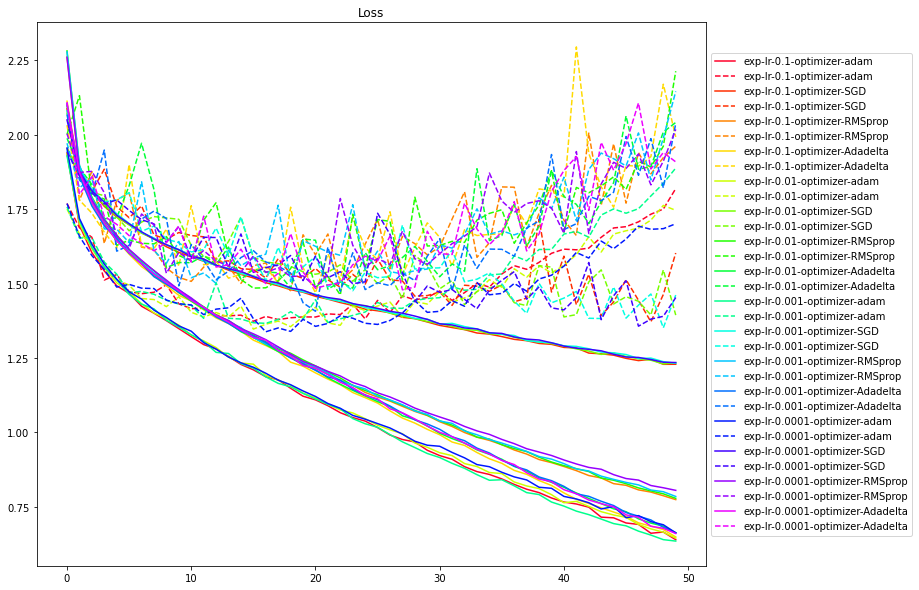

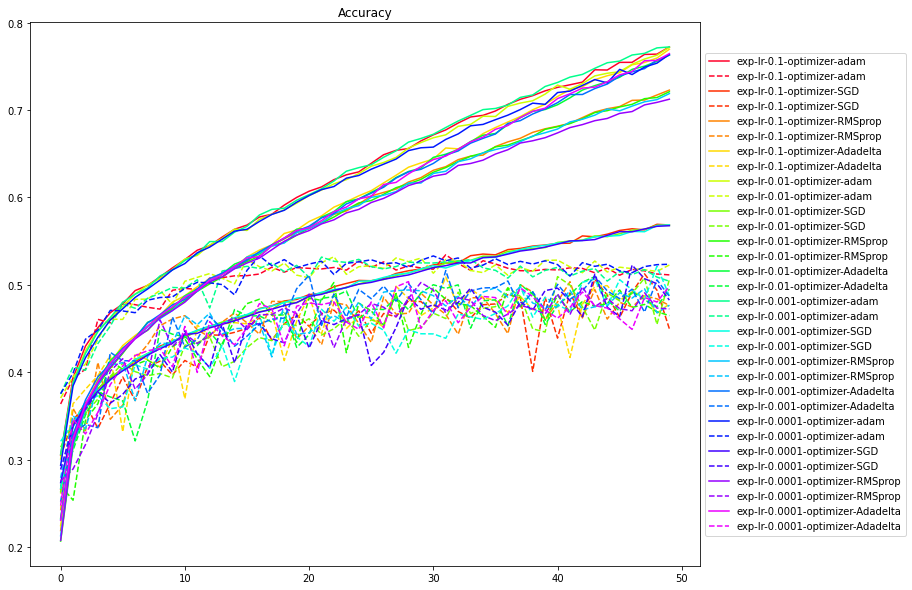

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
    
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(12,10))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(12,10))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()